In [4]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')  # function to list the available physical devices on the system. Specifically,
                                        # it's looking for GPUs (Graphics Processing Units) available in the system.

[]

In [ ]:
# DATA

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist  #This line imports the Fashion-MNIST dataset module from TensorFlow's Keras API.

(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

# This line loads the Fashion-MNIST dataset into four NumPy arrays: train_images, train_labels, valid_images, and valid_labels


4422102/4422102 [==============================] - 0s 0us/step


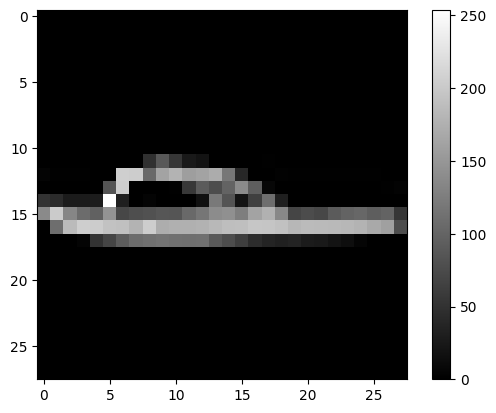

In [39]:
import matplotlib.pyplot as plt

data_idx = 30    # we can do upto 59999.

plt.figure() # A figure is a container for all the elements of a plot, such as the image and any annotations.
plt.imshow(train_images[data_idx], cmap='gray') # im show can show the image
                                # cmap='gray' specifies that the image should be displayed in grayscale
plt.colorbar() # its shows the colour bar like temperature meter
plt.grid(False)
plt.show()

In [11]:
train_labels[data_idx]

9

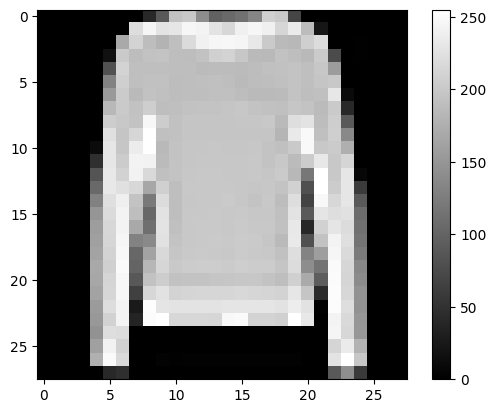

In [40]:
import matplotlib.pyplot as plt

data_idx = 99

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
valid_labels[data_idx]

7

In [ ]:
# we build the Neurons

In [14]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # this used to chenge the 2d into 1d
    tf.keras.layers.Dense(number_of_classes) # This is the second layer of the model. It is a fully connected (dense) layer that connects every neuron from the previous layer (Flatten) to each neuron in this layer.
])

In [18]:
# Verifying the model

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

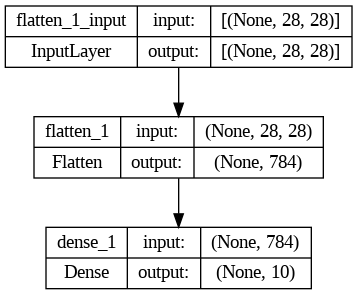

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
# evaluating model

In [24]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,       # The epochs parameter specifies the number of times the model will see the entire training dataset during training.
    verbose=True,   # The verbose parameter controls the amount of output displayed during training
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 16.8208 - accuracy: 0.7491 - val_loss: 16.1960 - val_accuracy: 0.7451
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 12.1807 - accuracy: 0.7888 - val_loss: 13.8284 - val_accuracy: 0.7813
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 11.2909 - accuracy: 0.7956 - val_loss: 12.1551 - val_accuracy: 0.7896
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 11.0214 - accuracy: 0.8002 - val_loss: 10.7367 - val_accuracy: 0.7906
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 10.5918 - accuracy: 0.8025 - val_loss: 12.2979 - val_accuracy: 0.7638


In [25]:
# Prediction

In [26]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 323ms/step


array([[-2.75512512e+02, -6.47648743e+02, -7.60440674e+01,
        -2.03155548e+02, -2.25934784e+02,  4.55966492e+02,
        -4.50054016e+01,  3.31989868e+02, -2.37802982e+01,
         7.18815125e+02],
       [ 3.71092834e+02, -2.16836426e+02,  3.38481171e+02,
         2.59835815e+02,  3.66870117e+01, -1.24947559e+03,
         3.46033051e+02, -1.80871411e+03, -1.96433365e+02,
        -9.26509399e+02],
       [ 8.67791290e+01,  6.01651192e+01,  9.06992798e+01,
         1.06663658e+02,  9.09483948e+01, -4.92542206e+02,
         7.47430573e+01, -4.94957977e+02, -1.35099976e+02,
        -2.56394653e+02],
       [ 1.79640945e+02,  9.53793106e+01,  1.86930801e+02,
         2.26584549e+02,  1.18467407e+02, -8.01196289e+02,
         1.85071045e+02, -1.04194885e+03, -1.72935776e+02,
        -6.56874573e+02],
       [ 2.20079132e+02,  2.61762329e+02,  1.90727081e+02,
         2.81884155e+02,  2.19802368e+02, -8.75579041e+02,
         1.75800674e+02, -7.53097534e+02, -9.23413773e+01,
        -7.

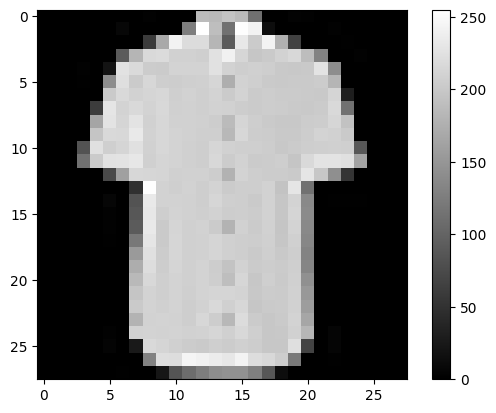

1/1 [==============================] - 0s 71ms/step


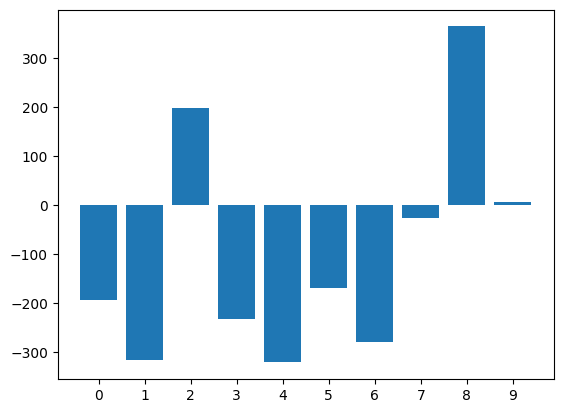

correct answer: 6


In [46]:
data_idx = 6643

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])